# Ejemplo con Tesseroides de Densidad Variable para Jóvenes Investigadores

Vamos a crear un Tesseroide, le asignaremos una densidad variable y calcularemos el efecto gravitatorio que genera.

## Importamos paquetes

### Numpy y Matplotlib

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings

warnings.filterwarnings('ignore')

### Fatiando

In [2]:
from fatiando import gridder
from fatiando.mesher import Tesseroid

### Nuevas funciones para densidad variable

In [3]:
from tesseroid_density import tesseroid

## Creamos la grilla de computo sobre la cual calcularemos los campos gravitatorios

In [4]:
area = (0, 30, 0, 30)
shape = (21, 21)
lat, lon, height = gridder.regular(area, shape, z=260e3)

## Creamos el tesseroide

In [5]:
w, e, s, n = 5, 25, 5, 25
top, bottom = 0, -15e3
tess = Tesseroid(w, e, s, n, top, bottom)

### Definimos una función densidad

In [6]:
rho0, rho1 = 2670, 3300
b = 5e3
a = (rho1 - rho0)/(np.exp((abs(top - bottom))/b) - 1)

In [7]:
def densidad(h):
    return (a - 1)*np.exp(-h/b) + rho0

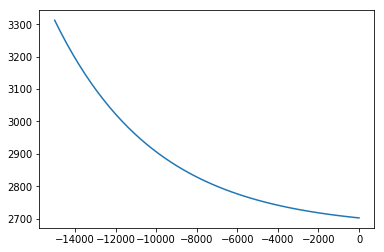

In [8]:
hs = np.linspace(bottom, top, 51)
plt.plot(hs, densidad(hs))
plt.show()

### Le asignamos esta densidad al tesseroide

In [9]:
tess.addprop('density', densidad)

## Calculamos el campo que genera

In [10]:
resultado = tesseroid.gz(lon, lat, height, [tess])

## Ploteamos el resultado

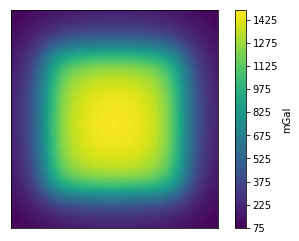

In [11]:
bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='i')

x, y = bm(lon, lat)
bm.contourf(x.reshape(shape),
            y.reshape(shape),
            resultado.reshape(shape),
            100)
plt.colorbar(label="mGal")
plt.show()